In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

C:\Users\cyril\AppData\Local\Temp\ipykernel_22364\2433342527.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2E77-A41D

 Directory of c:\Users\cyril\Documents\MSc Physics and Astronomy\Thesis\GitHub\Free_energy_of_simplicial_complexes\Cyril

17/03/2024  13:39    <DIR>          .
17/03/2024  13:39    <DIR>          ..
17/03/2024  13:39    <DIR>          .ipynb_checkpoints
08/03/2024  10:48         2.726.043 100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt
08/03/2024  10:48             6.326 Create PR data.ipynb
17/03/2024  09:49             2.267 Creating Corr Matrixes.ipynb
17/03/2024  09:49           227.684 Cyril_real_vs_random.ipynb
08/03/2024  10:48         5.635.498 PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt
17/03/2024  13:39    <DIR>          PR_CorreMatrixes
17/03/2024  13:39    <DIR>          PR_HCP
08/03/2024  10:48           337.984 prunned_matrix.txt100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcel

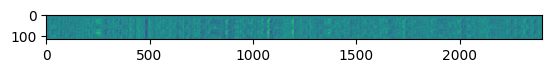

In [2]:
real=pd.read_csv('100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep ='\t',header=None)
plt.imshow(real)

(116, 116)


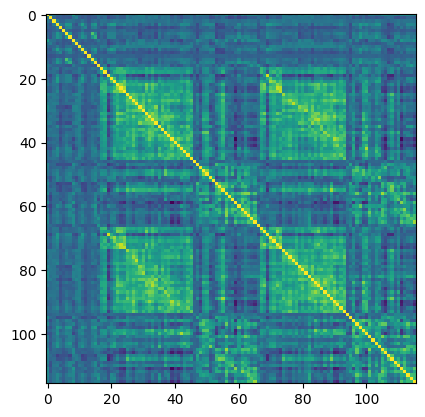

In [3]:
real_corr=real.T.corr().to_numpy()
print(np.shape(real_corr))
plt.imshow(real_corr)

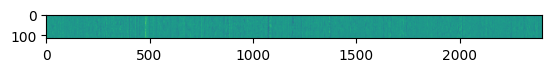

In [4]:
random=pd.read_csv('PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep ='\t',header=None, index_col=0)
#random=pd.read_csv('PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep ='\t',header=None)
plt.imshow(random)

(115, 115)


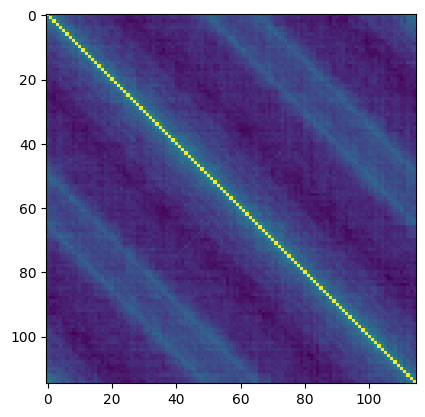

In [5]:
random_corr=random.T.corr().to_numpy()
print(np.shape(random_corr))
plt.imshow(random_corr)

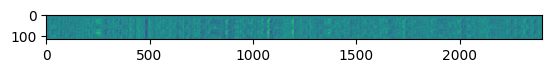

(116, 116)


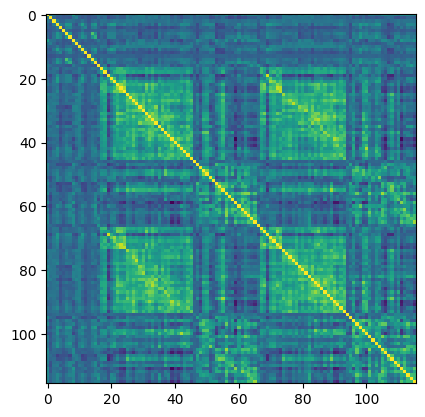

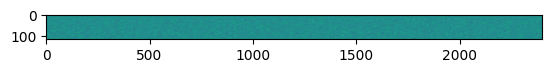

(116, 2400)
(116, 116)


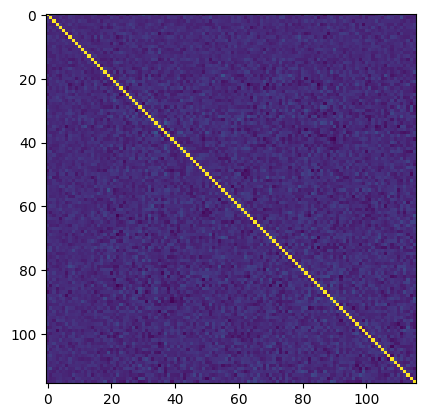

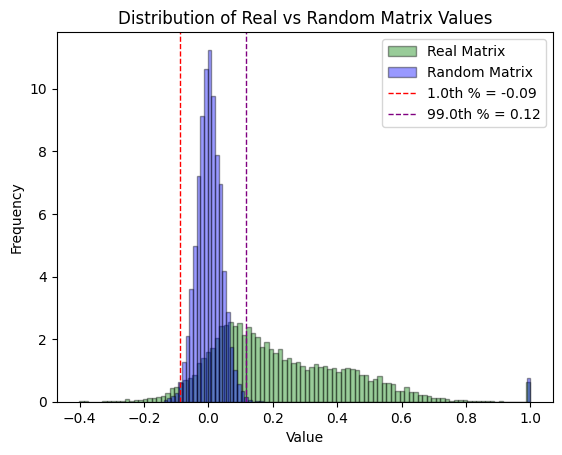

In [67]:
filename_raw_timeseries = 'REAL_100206.txt'
filename_PR_timeseries = 'PR_test.txt'

real=pd.read_csv(filename_raw_timeseries ,sep ='\t',header=None)
plt.imshow(real)
plt.show()

real_corr=real.T.corr().to_numpy()
print(np.shape(real_corr))
plt.imshow(real_corr)
plt.show()

random = pd.read_csv(filename_PR_timeseries, sep='\t', header=None)
plt.imshow(random)
plt.show()
print(np.shape(random))

random_corr=random.T.corr().to_numpy()
print(np.shape(random_corr))
plt.imshow(random_corr)
plt.show()

# Flatten the matrices
real_corr_flat = real_corr.flatten()
random_corr_flat = random_corr.flatten()

# Plot the distribution of correlation values for real vs random data
plt.hist(real_corr_flat, density=True, bins=100, label='Real Matrix', alpha=0.4, color='green', edgecolor='black')
plt.hist(random_corr_flat, density=True, bins=100, label='Random Matrix', alpha=0.4, color='blue', edgecolor='black')

# Calculate percentiles
q010 = np.quantile(random_corr_flat, 0.010)
q990 = np.quantile(random_corr_flat, 0.990)

# Draw red dotted lines at the 1.0th and 99.0th percentiles
plt.axvline(q010, color='red', linestyle='--', linewidth=1, label=f'1.0th % = {q010:.2f}')
plt.axvline(q990, color='purple', linestyle='--', linewidth=1, label=f'99.0th % = {q990:.2f}')

# Add legend to the plot
plt.legend()

# Optional: Add titles and labels
plt.title('Distribution of Real vs Random Matrix Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

13456
13456


ValueError: number of labels (2) does not match number of bars (114).

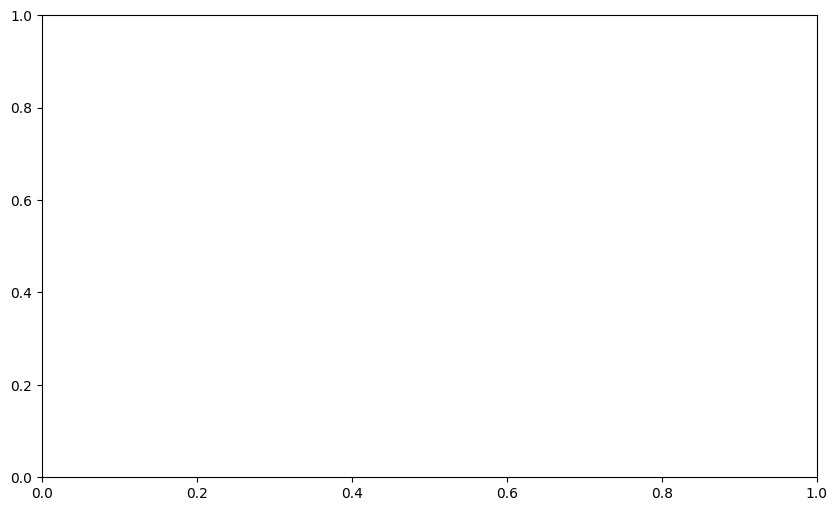

In [56]:
# Assuming real_corr and random_corr are your matrices
# Flatten the matrices
real_corr_flat = real_corr.flatten()
random_corr_flat = random_corr.flatten()

print(len(real_corr_flat))
print(len(random_corr_flat))

# Initialize a plot
plt.figure(figsize=(10, 6))

# Plot each with labels
sns.histplot([real_corr_flat,random_corr_flat], color=['blue','red'], label=['Real Matrix','Random Matrix'])
#sns.histplot(random_corr_flat, color='blue', label='Random Matrix')
#sns.histplot(real_corr_flat, color='red', label='Real Matrix')

# Add legend to the plot to show the labels
plt.legend()

# Optional: Add titles and labels
plt.title('Distribution of Real vs Random Matrix Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

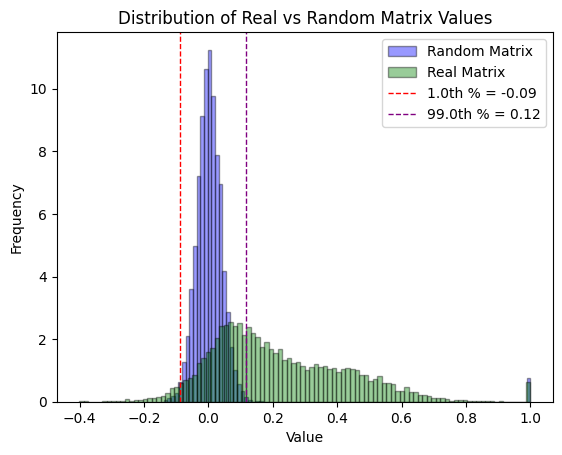

In [57]:
# Plot the distribution of correlation values for real vs random data
plt.hist(random_corr_flat, bins=100, density=True, label='Random Matrix', alpha=0.4, color='blue', edgecolor='black')
plt.hist(real_corr_flat, bins=100, density=True, label='Real Matrix', alpha=0.4, color='green', edgecolor='black')

# Calculate percentiles
q010 = np.quantile(random_corr_flat, 0.010)
q990 = np.quantile(random_corr_flat, 0.990)

# Draw red dotted lines at the 1.0th and 99.0th percentiles
plt.axvline(q010, color='red', linestyle='--', linewidth=1, label=f'1.0th % = {q010:.2f}')
plt.axvline(q990, color='purple', linestyle='--', linewidth=1, label=f'99.0th % = {q990:.2f}')

# Add legend to the plot
plt.legend()

# Optional: Add titles and labels
plt.title('Distribution of Real vs Random Matrix Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [58]:
import numpy as np

# Example matrices
random_matrix = random_corr  # Random matrix
real_matrix = real_corr  # Real matrix, replace with your actual real matrix

# Compute the 2.5th and 97.5th percentiles of the random matrix
q025 = np.quantile(random_matrix, 0.010)
q975 = np.quantile(random_matrix, 0.990)

print(q025)
print(q975)

# Create a mask for elements in the real matrix that are NOT between q025 and q975
#mask = (real_matrix < q025) | (real_matrix > q975)
mask = (real_matrix > q975)

# Apply mask to the real matrix
# Option 1: Set elements within the quantiles to 0 (or choose another value)
pruned_matrix = np.where(mask, real_matrix, 0)

# Option 2: If you want to completely remove these elements, it's a bit more complex
# as it would change the shape of the matrix. Typically, you'd work with the masked array
# or adapt your data structure for analyses that ignore these values.

# Show some of the pruned matrix values
print(pruned_matrix)  # Adjust as needed for your inspection


-0.0884358385984015
0.11809129052482614
[[1.         0.16536556 0.15758851 ... 0.25248465 0.23382147 0.24995966]
 [0.16536556 1.         0.         ... 0.         0.         0.        ]
 [0.15758851 0.         1.         ... 0.14015591 0.1416177  0.13303256]
 ...
 [0.25248465 0.         0.14015591 ... 1.         0.56883272 0.54148824]
 [0.23382147 0.         0.1416177  ... 0.56883272 1.         0.54287107]
 [0.24995966 0.         0.13303256 ... 0.54148824 0.54287107 1.        ]]


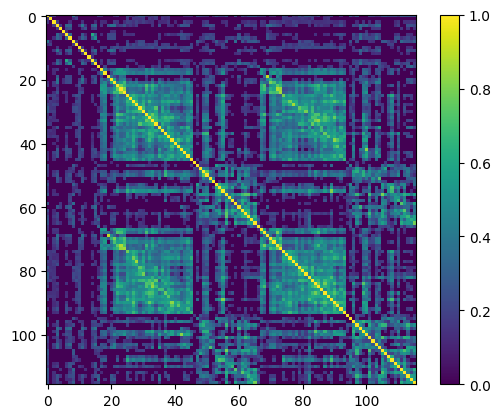

In [59]:
plt.imshow(pruned_matrix)
plt.colorbar()
plt.show()

In [26]:
np.savetxt('prunned_matrix.txt',pruned_matrix)

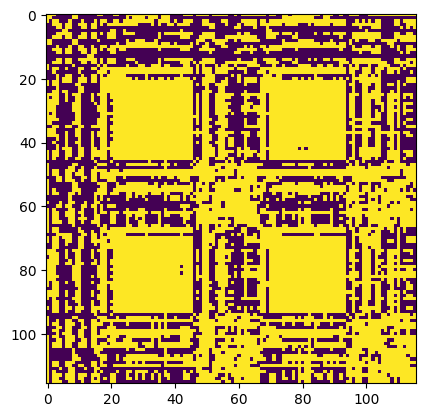

In [60]:
pruned_matrix = np.where(pruned_matrix != 0, 1, pruned_matrix)
plt.imshow(pruned_matrix)

In [61]:
pruned_matrix = pruned_matrix - np.eye(len(pruned_matrix),len(pruned_matrix))

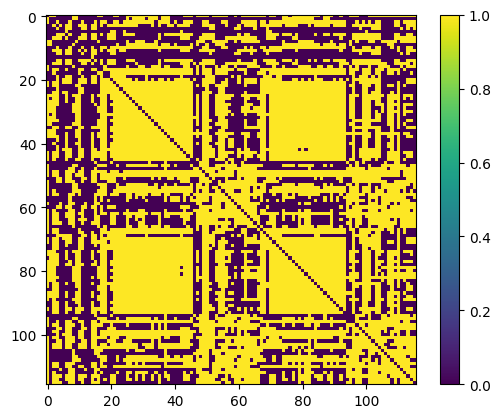

In [62]:
plt.imshow(pruned_matrix)
plt.colorbar()
plt.show()

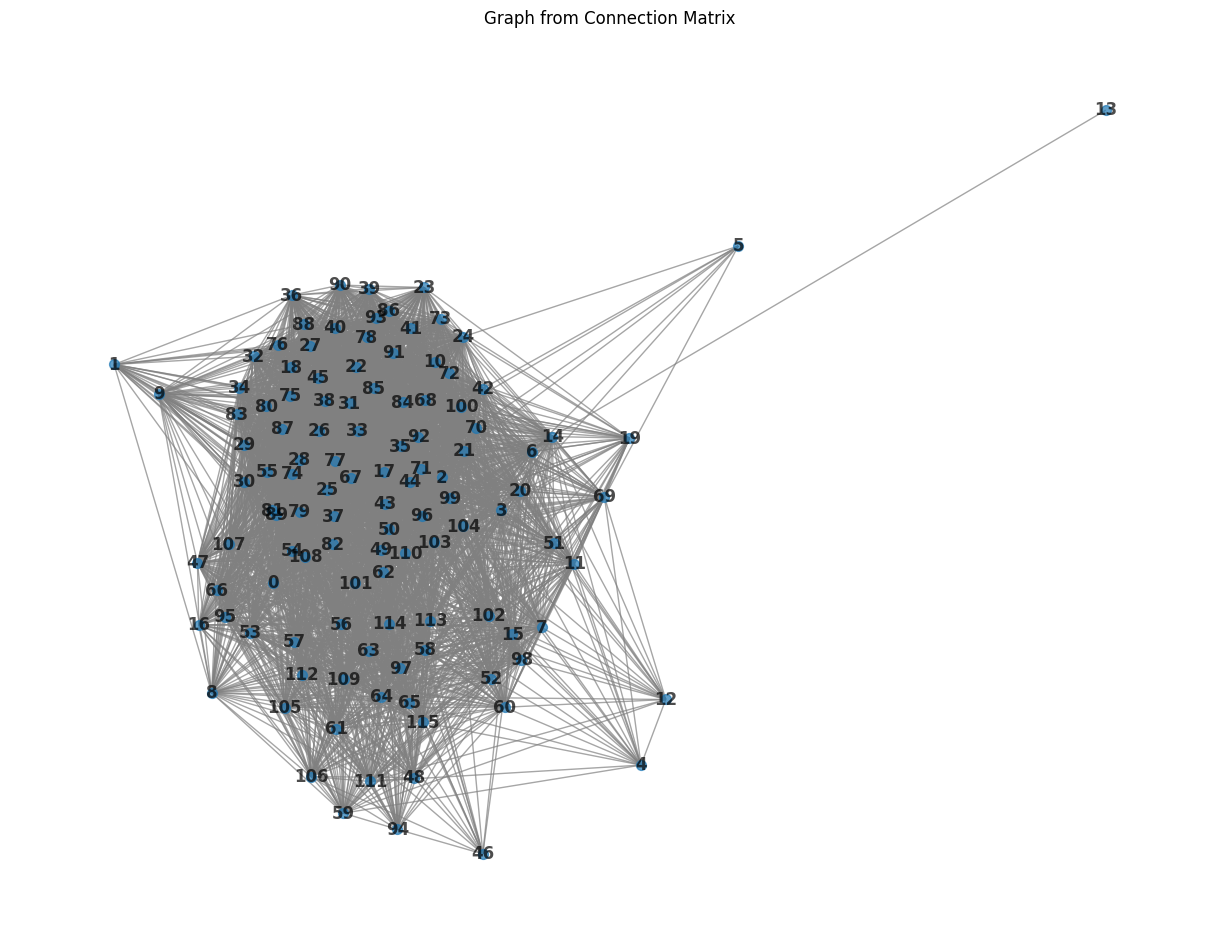

In [64]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Sample connection matrix (replace this with your actual matrix)
connection_matrix = pruned_matrix

# Create a graph from the connection matrix
G = nx.from_numpy_array(connection_matrix)

# Calculate the layout using the Fruchterman-Reingold algorithm
pos = nx.spring_layout(G, seed=12)  # You can adjust the seed for reproducibility

# Plot the graph
plt.figure(figsize=(12, 9))  # Increase the figure size for better visibility
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=50, edge_color='gray', alpha=0.7)
plt.title("Graph from Connection Matrix")
plt.show()

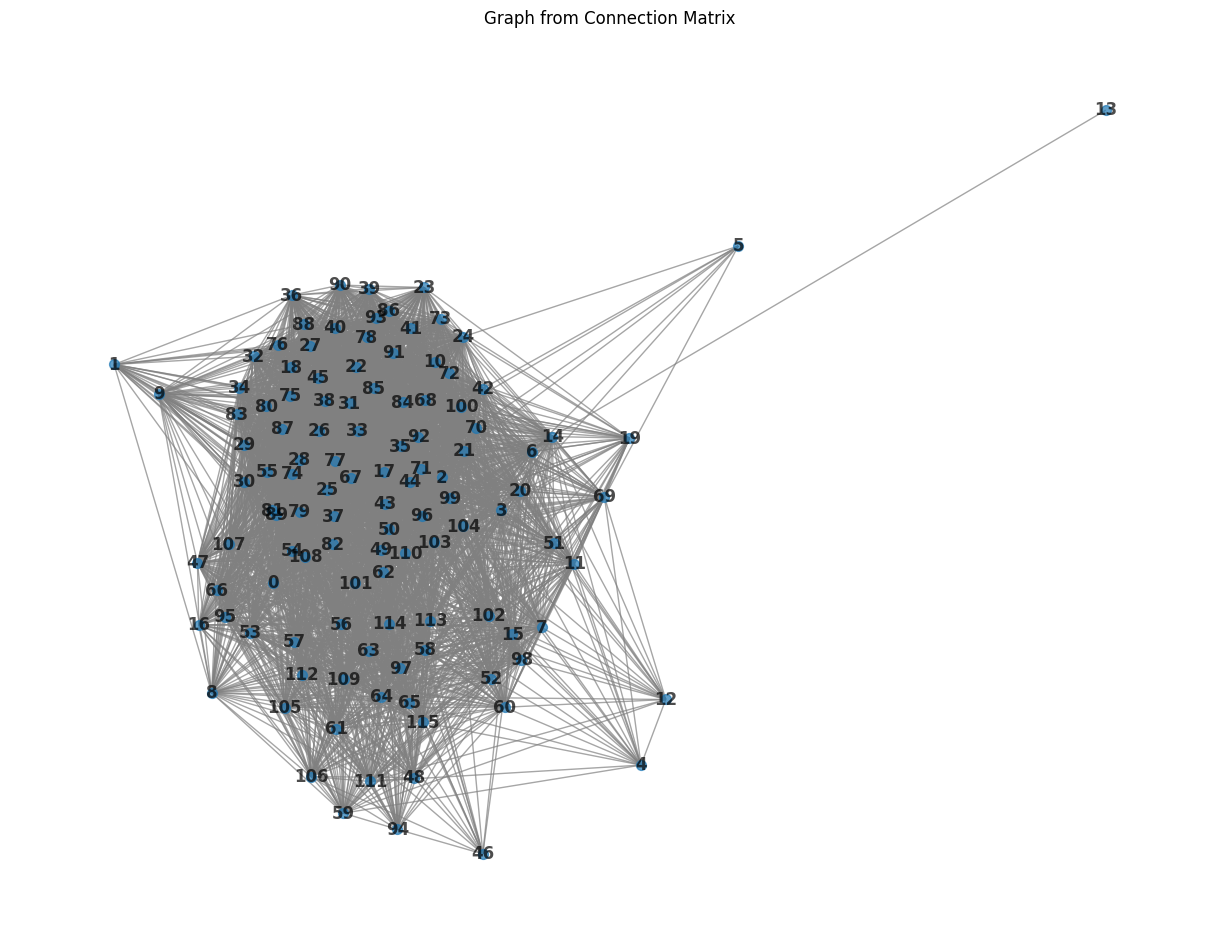

In [63]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Sample connection matrix (replace this with your actual matrix)
connection_matrix = pruned_matrix

# Create a graph from the connection matrix
G = nx.from_numpy_array(connection_matrix)

# Calculate the layout using the Fruchterman-Reingold algorithm
pos = nx.spring_layout(G, seed=12)  # You can adjust the seed for reproducibility

# Plot the graph
plt.figure(figsize=(12, 9))  # Increase the figure size for better visibility
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=50, edge_color='gray', alpha=0.7)
plt.title("Graph from Connection Matrix")
plt.show()

In [16]:
# Generate the clique complex
def build_clique_complex_new(adjacency_matrix, max_clique_size):
    # Create the graph directly from the adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)

    # Enumerate all cliques directly
    all_cliques = list(nx.enumerate_all_cliques(G))

    # Building the clique complex
    seen_cliques = {tuple(sorted(clique)) for clique in all_cliques if len(clique) <= max_clique_size}

    # Sort the list of sets based on the length of cliques and sorted vertices within each clique
    clique_complex = sorted(map(frozenset, seen_cliques), key=lambda x: (len(x), sorted(x)))

    return clique_complex

In [18]:
correlation_matrix = pruned_matrix
max_clique_size = 3

print(len(build_clique_complex_new(correlation_matrix, max_clique_size)))

3817


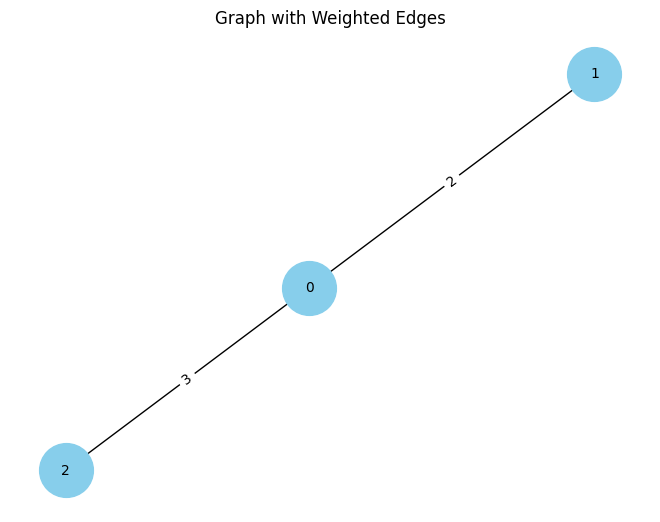

In [69]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a non-binary matrix representing a weighted graph
matrix = np.array([[0, 2, 3],
                   [2, 0, 0],
                   [3, 0, 0]])

# Create a graph from the matrix
G = nx.from_numpy_array(matrix)

# Create a layout for our nodes 
layout = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos=layout, with_labels=True, node_color='skyblue', node_size=1500, font_size=10)

# Draw edge labels
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

# Show the plot
plt.title('Graph with Weighted Edges')
plt.show()